# DATA ANALYSIS WITH PANDAS

Importing necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Finding a data set to work with

The chosen data set has been downloaded from kaggle.com. Its reference website is "https://www.kaggle.com/new-york-state/nys-forest-ranger-wildland-fire-reporting".

Such data set contains information about wildland fires recorded after 2007 under the state of New York.

In [2]:
fireDf=pd.read_csv("./firedata.csv")

In [3]:
fireDf.head()

,Fire Number,Incident Name,Fire Start Date,Initial Report Date,Fire Out Date,Region,Zone,County,Municipality,Cause,...,Fatalities,Injuries,Homes Lost,Homes Threatened,Other Structures Lost,Other Structures Threatened,Reporting Ranger,Fire Report Method,Railroad Name,Location 1
0,NYS-2008-0001,OBPP Powerline Surge,2008-01-21T00:00:00,2008-01-21T00:00:00,2008-01-21T00:00:00,1,1A,SUFFOLK,BABYLON,Equipment,...,0,0,0,0,0,0,"Byrnes,Timothy",Fire Department,NaN,"{'longitude': '-73.29247', 'needs_recoding': F..."
1,NYS-2008-0002,Otis Pike @ Dog Pond Line Rd,2008-03-18T00:00:00,2008-03-18T00:00:00,2008-03-18T00:00:00,1,1A,SUFFOLK,RIVERHEAD,Prescribed Fire,...,0,0,0,0,0,0,"Byrnes,Timothy",Supervisor,NaN,"{'longitude': '-72.802', 'needs_recoding': Fal..."
2,NYS-2008-0003,Otis Pike @ Linus Dog Pond,2008-03-18T00:00:00,2008-03-18T00:00:00,2008-03-18T00:00:00,1,1A,SUFFOLK,RIVERHEAD,Prescribed Fire,...,0,0,0,0,0,0,"Byrnes,Timothy",Supervisor,NaN,"{'longitude': '-72.818', 'needs_recoding': Fal..."
3,NYS-2008-0004,Quadt Fire,2008-03-22T00:00:00,2008-03-22T00:00:00,2008-03-22T00:00:00,4,4B,SCHOHARIE,SCHOHARIE,Miscellaneous,...,0,0,0,0,0,0,"Henry,William",911 Dispatch,NaN,"{'longitude': '-74.32', 'needs_recoding': Fals..."
4,NYS-2008-0005,Prestons Pond,2008-03-22T00:00:00,2008-03-22T00:00:00,2008-03-22T00:00:00,1,1A,SUFFOLK,RIVERHEAD,Prescribed Fire,...,0,0,0,0,0,0,"Byrnes,Timothy",Supervisor,NaN,"{'longitude': '-72.82048', 'needs_recoding': F..."


## Cleaning the data set before performing the analysis

Some of the columns are not really of interest for our analysis so we can drop them.

In [4]:
fireDf.columns

Index(['Fire Number', 'Incident Name', 'Fire Start Date',
       'Initial Report Date', 'Fire Out Date', 'Region', 'Zone', 'County',
       'Municipality', 'Cause', 'NFFL Fuel Model', 'Complex Type', 'Acreage',
       'Latitude', 'Longitude', 'Ownership', 'State Land Unit Name', 'Total',
       'Fatalities', 'Injuries', 'Homes Lost', 'Homes Threatened',
       'Other Structures Lost', 'Other Structures Threatened',
       'Reporting Ranger', 'Fire Report Method', 'Railroad Name',
       'Location 1'],
      dtype='object')

In [5]:
cleanFireDf=fireDf.drop(columns=['Fire Number', 'Incident Name', 'Region', 'Zone', 'Initial Report Date','Municipality','Latitude', 'Longitude','State Land Unit Name', 'Total', 'Reporting Ranger','Fire Report Method', 'Railroad Name',
       'Location 1'])

We also need to identify null values from the remaining data

In [6]:
null_cols = cleanFireDf.isnull().sum()
null_cols[null_cols > 0]

Cause           1
Complex Type    1
dtype: int64

There is a really low count of nulls in the dataset hence it is better to delete registers containing any null to ensure operations can be developed properly.

In [7]:
drop_cols = list(null_cols[null_cols > 0].index)
cleanFireDf = cleanFireDf.dropna()

We now want to evaluate if data types are appropiate:

In [8]:
cleanFireDf.dtypes

Fire Start Date                 object
Fire Out Date                   object
County                          object
Cause                           object
NFFL Fuel Model                 object
Complex Type                   float64
Acreage                        float64
Ownership                       object
Fatalities                       int64
Injuries                         int64
Homes Lost                       int64
Homes Threatened                 int64
Other Structures Lost            int64
Other Structures Threatened      int64
dtype: object

We have identify three columns that should chaing its data type

In [9]:
cleanFireDf['Fire Start Date']=cleanFireDf['Fire Start Date'].astype("datetime64")

In [10]:
cleanFireDf['Fire Out Date']=cleanFireDf['Fire Out Date'].astype("datetime64")

In [11]:
cleanFireDf['Complex Type']=cleanFireDf['Complex Type'].astype("int")

We have decided that having an extra column identifying unique events is also useful for certain future operations

In [12]:
cleanFireDf['EventID']=cleanFireDf.index

We are also changing the order of the columns for easiness

In [13]:
cleanFireDf= cleanFireDf[['EventID','Fire Start Date', 'Fire Out Date', 'County', 'Ownership', 'Cause',
       'NFFL Fuel Model', 'Complex Type', 'Acreage', 'Fatalities',
       'Injuries', 'Homes Lost', 'Homes Threatened', 'Other Structures Lost',
       'Other Structures Threatened']]

## Perform a preliminary analysis

In [14]:
cleanFireDf.head()

,EventID,Fire Start Date,Fire Out Date,County,Ownership,Cause,NFFL Fuel Model,Complex Type,Acreage,Fatalities,Injuries,Homes Lost,Homes Threatened,Other Structures Lost,Other Structures Threatened
0,0,2008-01-21,2008-01-21,SUFFOLK,State Forest/RF Area,Equipment,8 - Timber - Light Hardwood Litter,5,0.2,0,0,0,0,0,0
1,1,2008-03-18,2008-03-18,SUFFOLK,Wildlife Management Area,Prescribed Fire,1 - Grass - Light,5,10.9,0,0,0,0,0,0
2,2,2008-03-18,2008-03-18,SUFFOLK,Wildlife Management Area,Prescribed Fire,1 - Grass - Light,5,2.3,0,0,0,0,0,0
3,3,2008-03-22,2008-03-22,SCHOHARIE,Private Property,Miscellaneous,1 - Grass - Light,5,0.2,0,0,0,0,0,0
4,4,2008-03-22,2008-03-22,SUFFOLK,Wildlife Management Area,Prescribed Fire,1 - Grass - Light,5,5.8,0,0,0,0,0,0


In [15]:
cleanFireDf.describe()

,EventID,Complex Type,Acreage,Fatalities,Injuries,Homes Lost,Homes Threatened,Other Structures Lost,Other Structures Threatened
count,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000
mean,755.663360,4.554233,14.563294,0.001323,0.037037,0.008598,0.191799,0.082672,0.044974
std,436.880815,0.780111,122.407991,0.036358,0.267258,0.111806,3.071224,1.213389,0.397662
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,377.750000,4.000000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,755.500000,5.000000,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1133.250000,5.000000,6.225000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1513.000000,5.000000,2855.000000,1.000000,4.000000,3.000000,89.000000,39.000000,12.000000


In [16]:
cleanFireDf['Cause'].value_counts()

Debris Burning     345
Campfire           286
Incendiary         244
Prescribed Fire    149
Miscellaneous       92
Smoking             92
Equipment           86
Power line          70
Lightning           67
Children            40
Railroad            17
Structure           13
Fireworks           11
Name: Cause, dtype: int64

In [17]:
cleanFireDf['Ownership'].value_counts()

Private Property            876
Forest Preserve             178
State Forest/RF Area        140
Other Government            113
Wildlife Management Area     67
Unique Area                  39
OPR&HP (State Parks)         35
Federal Lands                21
Other Not Classified         19
Wilderness Area              13
Conservation Easement         9
Native American Lands         2
Name: Ownership, dtype: int64

In [18]:
cleanFireDf['NFFL Fuel Model'].value_counts()

 8 - Timber - Light Hardwood Litter         458
 9 - Timber - Medium Hardwood Litter        327
 1 - Grass - Light                          231
 3 - Grass - Heavy                          109
10 - Timber  - Heavy Litter/Downed Fuels     87
 7 - Brush - Understory                      70
 6 - Brush - Mixed/Regeneration              65
 2 - Grass - Understory                      58
 5 - Brush - Continuous but Light            52
12 - Slash - Medium                          18
11 - Slash - Light                           15
 4 - Brush - Heavy/Volatile                  15
13 - Slash Heavy                              7
Name: NFFL Fuel Model, dtype: int64

## Hypothesis 1

After a first look at the data we have gathered the following hypothesis:
    
We observed that most of the fires happened in private lands where we assume that the number of houses and structures threatened or lost by the fire are higher than in public lands, being this fact linked with a higher number of fatalities and injuries. 

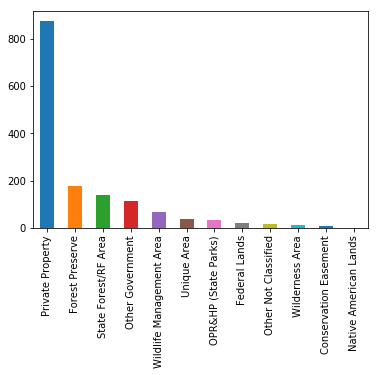

In [19]:
cleanFireDf['Ownership'].value_counts().plot(kind='bar')

From seeing this data, we believe that making dividing it into just three categories will help understanding results better

In [20]:
def simplifyValues(x):
    if "Private" in x:
        x="Private Property"
    elif "Not Classified" in x:
        x="Not Classified"
    else:
        x="Public Property"
    return x


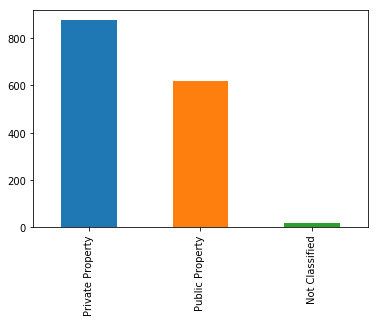

In [21]:
cleanFireDf['Ownership']=cleanFireDf['Ownership'].apply(lambda x: simplifyValues(x))
cleanFireDf['Ownership'].value_counts().plot(kind='bar')

We have also decided that for checking our hypothesis is not necessary to diffenciate between injuries and fatalities, and between  houses and structures lost and threatened. So we can apply a function de simplify this columns:

In [22]:
cleanFireDf.columns

Index(['EventID', 'Fire Start Date', 'Fire Out Date', 'County', 'Ownership',
       'Cause', 'NFFL Fuel Model', 'Complex Type', 'Acreage', 'Fatalities',
       'Injuries', 'Homes Lost', 'Homes Threatened', 'Other Structures Lost',
       'Other Structures Threatened'],
      dtype='object')

In [23]:
def sumColumns(columnName,dataframe1, arrayColumns, arrayNames):
    total=arrayColumns[0]
    for i in range(len(arrayColumns))[1:]:
        total+=arrayColumns[i]
    [dataframe1.drop([e],1, inplace=True) for e in arrayNames]
    dataframe1[columnName]=total
    return dataframe1

In [24]:
cleanFireDf=sumColumns("Sum Victims",cleanFireDf,[cleanFireDf['Fatalities'],cleanFireDf['Injuries']],['Fatalities', 'Injuries'])
cleanFireDf=sumColumns("Sum Affected Structures",cleanFireDf,[cleanFireDf['Homes Lost'],cleanFireDf['Homes Threatened'],cleanFireDf['Other Structures Lost'],cleanFireDf['Other Structures Threatened']],['Homes Lost','Homes Threatened','Other Structures Lost','Other Structures Threatened'])

In [25]:
cleanFireDf.head()

,EventID,Fire Start Date,Fire Out Date,County,Ownership,Cause,NFFL Fuel Model,Complex Type,Acreage,Sum Victims,Sum Affected Structures
0,0,2008-01-21,2008-01-21,SUFFOLK,Public Property,Equipment,8 - Timber - Light Hardwood Litter,5,0.2,0,0
1,1,2008-03-18,2008-03-18,SUFFOLK,Public Property,Prescribed Fire,1 - Grass - Light,5,10.9,0,0
2,2,2008-03-18,2008-03-18,SUFFOLK,Public Property,Prescribed Fire,1 - Grass - Light,5,2.3,0,0
3,3,2008-03-22,2008-03-22,SCHOHARIE,Private Property,Miscellaneous,1 - Grass - Light,5,0.2,0,0
4,4,2008-03-22,2008-03-22,SUFFOLK,Public Property,Prescribed Fire,1 - Grass - Light,5,5.8,0,0


In [35]:
cleanFireDf.pivot_table(index=["Ownership"], values=["Sum Victims","Sum Affected Structures"],aggfunc=["mean","median","max","min","std","sum"])

mean                              median  \
                 Sum Affected Structures Sum Victims Sum Affected Structures   
Ownership                                                                      
Not Classified                  1.052632    0.052632                       0   
Private Property                0.350457    0.047945                       0   
Public Property                 0.273906    0.024311                       0   

                                                 max              \
                 Sum Victims Sum Affected Structures Sum Victims   
Ownership                                                          
Not Classified             0                      19           1   
Private Property           0                      70           4   
Public Property            0                      89           3   

                                     min                                 std  \
                 Sum Affected Structures Sum Victims Sum Affected Structures   
Ownership                                                                      
Not Classified                         0           0                4.352186   
Private Property                       0           0                2.948978   
Public Property                        0           0                4.227060   

                                                 sum              
                 Sum Victims Sum Affected Structures Sum Victims  
Ownership                                                         
Not Classified      0.229416                      20           1  
Private Property    0.282815                     307          42  
Public Property     0.250439                     169          15

We can see from the values above that the private property's values are higher so we can conclude that the risk of getting people injured and infrastructures affected by fire is higher in private properties than in public properties. Surprisingly, the "not classified" properties are the ones with the higher ratio of people and infrastructures affected, it would be interesting to know what kind of space these are.

## Hypothesis 2

It would be logic to think that acreage, victims and affected infrastructures have a direct correlation, so the more land that burns the higher the number of people and houses affected

Text(0, 0.5, 'Sum Victims')

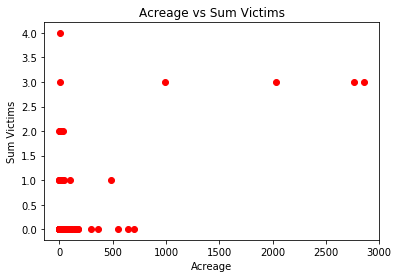

In [37]:
plt.scatter(x=cleanFireDf["Acreage"], y=cleanFireDf["Sum Victims"], color=['red'])
plt.title("Acreage vs Sum Victims")
plt.xlabel("Acreage")
plt.ylabel("Sum Victims")

Text(0, 0.5, 'Sum Affected Structures')

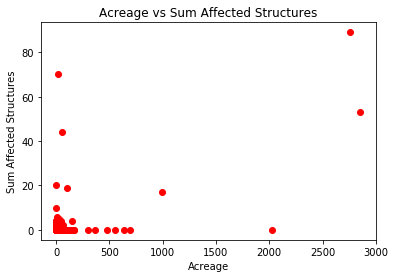

In [39]:
plt.scatter(x=cleanFireDf["Acreage"], y=cleanFireDf["Sum Affected Structures"], color=['red'])
plt.title("Acreage vs Sum Affected Structures")
plt.xlabel("Acreage")
plt.ylabel("Sum Affected Structures")

Text(0, 0.5, 'Sum Affected Structures')

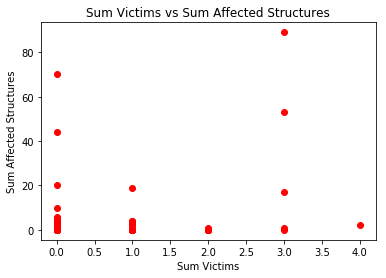

In [40]:
plt.scatter(x=cleanFireDf["Sum Victims"], y=cleanFireDf["Sum Affected Structures"], color=['red'])
plt.title("Sum Victims vs Sum Affected Structures")
plt.xlabel("Sum Victims")
plt.ylabel("Sum Affected Structures")

From the above scatter plot we can't be sure if our hypothesis is true, data is distributed in a way that does not communicate a direct relationship

We can calculate the correlations between our data to see if these are more useful:

In [38]:
cleanFireDf.corr()

,EventID,Complex Type,Acreage,Sum Victims,Sum Affected Structures
EventID,1.000000,0.180521,0.008949,-0.097564,-0.041650
Complex Type,0.180521,1.000000,-0.187795,-0.148388,-0.146270
Acreage,0.008949,-0.187795,1.000000,0.521019,0.631854
Sum Victims,-0.097564,-0.148388,0.521019,1.000000,0.353403
Sum Affected Structures,-0.041650,-0.146270,0.631854,0.353403,1.000000


We can confirm from the Pearson method above that it exist a positive correlation between Acreage, Sum Victims and Sum Affected Structures that could support our hypothesis. We also observe that Acreage and Complex Type maintain a negative correlation which makes sense reading at the definition of Complex Type ( Incident command system classification of complexity of the incident. “1” is a very large incident, “5” is a small incident). A lower complex type (larger incident) would cause more land to burn.

In [41]:
cleanFireDf.corr(method="spearman")

,EventID,Complex Type,Acreage,Sum Victims,Sum Affected Structures
EventID,1.000000,0.222091,-0.012461,-0.114677,-0.230698
Complex Type,0.222091,1.000000,-0.344415,-0.142392,-0.107184
Acreage,-0.012461,-0.344415,1.000000,0.108143,0.065579
Sum Victims,-0.114677,-0.142392,0.108143,1.000000,0.186511
Sum Affected Structures,-0.230698,-0.107184,0.065579,0.186511,1.000000


From the Spearman method, we also see certain correlation between Acreage and Sum Victims, althogh values are very low. The correlation between Sum Affected Structures and Acreage is almost unexisting. However the correlation between Acreage and Complex Type is even higher that with Pearson method which could help us reaffirm their relationship.

Due to the scatter plots' information and the values received from the correlations methods, we feel we cannot confirm hypothesis 2. A more complete data set or a different approach is necessary to be able to contrast data.

#Doubt1: is it worth in any case converting categorical data into numerical data (assigning a number to each category) in order to see correlations? I am not sure how accurate this would be.. I tried doing this with the NFFL Fuel Model but correlation very low with all other columns when I expected to have much higher correlation, like for instance FuelType vs Acreage, since fire in a specific fuel would spread much quicker than in others (fallen woord vs green trees).